In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pandas_profiling
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import SVD #  modelo de Singular Value Decomposition
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

In [2]:
import ydata_profiling

In [3]:
import ast
from collections import Counter

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer


In [6]:
df=pd.read_csv("datasets/moviestrasnf.csv")

C:\Users\david\AppData\Local\Temp\ipykernel_8696\4108849558.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("datasets/moviestrasnf.csv")


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4491 non-null   object 
 1   budget                 45466 non-null  object 
 2   genres                 45466 non-null  object 
 3   id                     45466 non-null  object 
 4   original_language      45455 non-null  object 
 5   overview               44512 non-null  object 
 6   popularity             45461 non-null  object 
 7   production_companies   45466 non-null  object 
 8   production_countries   45466 non-null  object 
 9   release_date           45376 non-null  object 
 10  revenue                45466 non-null  float64
 11  runtime                45203 non-null  float64
 12  spoken_languages       45466 non-null  object 
 13  status                 45379 non-null  object 
 14  tagline                20412 non-null  object 
 15  ti

In [8]:
# Seleccionar solo las columnas que se van a utilizar
ndf = df.loc[:, ['id', 'title', 'vote_average']]
# Eliminar las filas con valores nulos en alguna de esas columnas
ndf = ndf.dropna()

In [9]:
ndf = ndf.sort_values('vote_average', ascending=False)

In [10]:
ndf.head(191)

,id,title,vote_average
21642,320849,Ice Age Columbus: Who Were the First Americans?,10.0
15710,96451,If God Is Willing and da Creek Don't Rise,10.0
22396,72123,Meat the Truth,10.0
22395,230864,Marvin Hamlisch: What He Did For Love,10.0
35343,140595,Elaine Stritch: At Liberty,10.0
...,...,...,...
42612,390837,Stephen Lynch: Hello Kalamazoo,10.0
25565,145162,The Walking Stick,10.0
39760,86360,Sunnyside Up,10.0
14341,234937,Forever,10.0


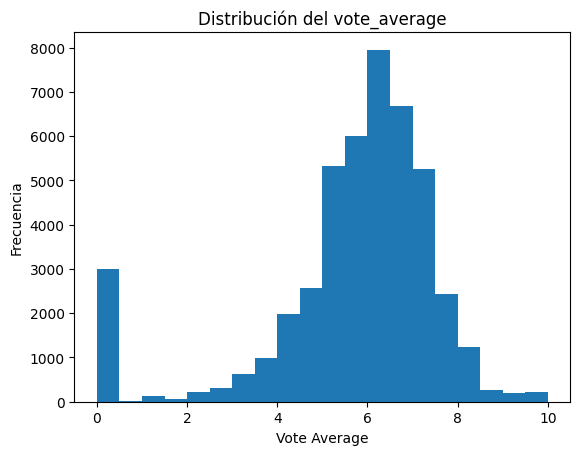

In [11]:
# Crear histograma
plt.hist(ndf['vote_average'], bins=20)

# Configurar título y etiquetas de los ejes
plt.title('Distribución del vote_average')
plt.xlabel('Vote Average')
plt.ylabel('Frecuencia')

# Mostrar gráfico
plt.show()

In [12]:
# Seleccionar solo las columnas que se van a utilizar
mdf = df.loc[:, ['title', 'revenue', 'return', 'budget']]
# Eliminar las filas con valores nulos en alguna de esas columnas
mdf = mdf.dropna()

In [13]:
mdf = mdf.sort_values('return', ascending=False)

In [14]:
mdf.head(5)

,title,revenue,return,budget
4000,Less Than Zero,12396383.0,1.239638e+07,1
3342,Modern Times,8500000.0,8.500000e+06,1
14372,Welcome to Dongmakgol,33579813.0,4.197477e+06,8
22278,Aquí Entre Nos,2755584.0,2.755584e+06,1
2308,"The Karate Kid, Part II",115103979.0,1.018619e+06,113


In [15]:
mdf = mdf.sort_values('revenue', ascending=False)

In [16]:
mdf.head(5)

,title,revenue,return,budget
14551,Avatar,2.787965e+09,11.763566,237000000
26555,Star Wars: The Force Awakens,2.068224e+09,8.441729,245000000
1639,Titanic,1.845034e+09,9.225171,200000000
17818,The Avengers,1.519558e+09,6.907081,220000000
25084,Jurassic World,1.513529e+09,10.090192,150000000


In [17]:
mdf = mdf.sort_values('budget', ascending=False)

In [18]:
mdf.head(18)

,title,revenue,return,budget
9247,Revolutionary Girl Utena: The Movie,0.0,0.000000,998000
39203,Life Feels Good,0.0,0.000000,996519
11609,Kidulthood,165000.0,0.165996,994000
34215,The Peanuts Movie,246233113.0,2.487203,99000000
39688,Don't Breathe,157100845.0,15.868772,9900000
39842,Friend Request,2400000.0,0.242424,9900000
39793,Elle,2341534.0,0.238818,9804690
30179,BMX Bandits,0.0,0.000000,980385
14,Cutthroat Island,10017322.0,0.102218,98000000
4142,The Mummy Returns,433013274.0,4.418503,98000000


In [19]:
# Contar la cantidad de películas por año
movies_per_year = df['release_year'].value_counts().sort_index()

# Crear un nuevo DataFrame con los años y el número de películas por año
df_movies_per_year = pd.DataFrame({'Año': movies_per_year.index, 'Número de películas': movies_per_year.values})

In [20]:
df_movies_per_year = df_movies_per_year.sort_values('Número de películas', ascending=False)

In [21]:
df_movies_per_year.head(5) 

,Año,Número de películas
129,2014.0,1974
130,2015.0,1905
128,2013.0,1889
127,2012.0,1722
126,2011.0,1667


In [22]:
df_movies_per_year.tail(5) 

,Año,Número de películas
1,1878.0,1
8,1893.0,1
3,1887.0,1
2,1883.0,1
134,2020.0,1


In [23]:
df.describe()

,revenue,runtime,vote_average,release_year,return
count,4.546600e+04,45203.000000,45460.000000,45376.000000,4.546600e+04
mean,1.120787e+07,94.128199,5.618207,1991.881193,6.587362e+02
std,6.432813e+07,38.407810,1.924216,24.055360,7.461933e+04
min,0.000000e+00,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,85.000000,5.000000,1978.000000,0.000000e+00
50%,0.000000e+00,95.000000,6.000000,2001.000000,0.000000e+00
75%,0.000000e+00,107.000000,6.800000,2010.000000,0.000000e+00
max,2.787965e+09,1256.000000,10.000000,2020.000000,1.239638e+07


In [24]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

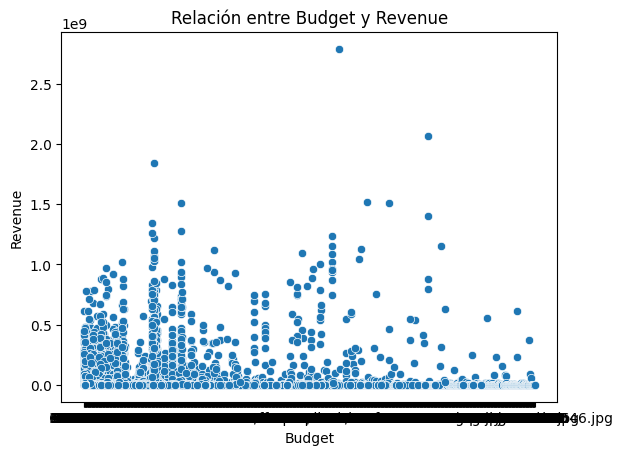

In [25]:
# Creamos el scatter plot con Seaborn
sns.scatterplot(data=df, x='budget', y='revenue')

# Añadimos etiquetas al gráfico
plt.title('Relación entre Budget y Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')

# Mostramos el gráfico
plt.show()

In [26]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

In [27]:
df["budget"] = pd.to_numeric(df["budget"], errors="coerce")
df["popularity"] = pd.to_numeric(df["popularity"], errors="coerce")

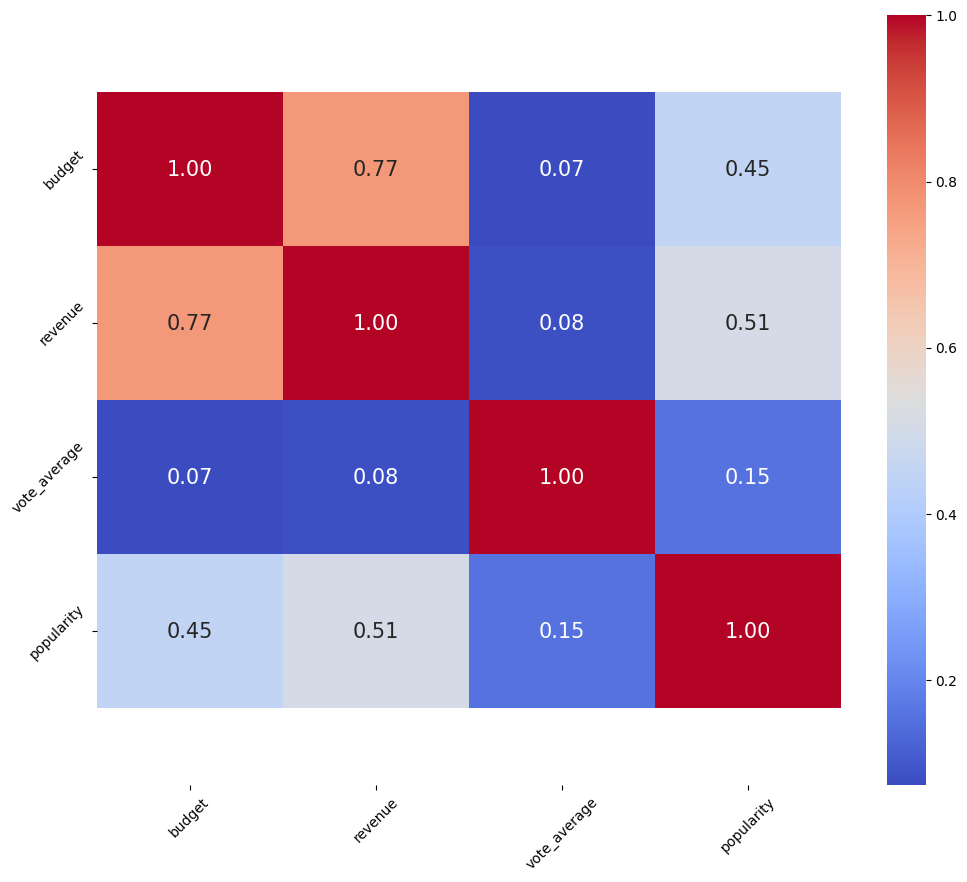

In [28]:
corr = df[["budget", "revenue", "vote_average", "popularity", "production_companies"]].corr(numeric_only=True)
plot_corre_heatmap(corr)

In [29]:
model = SVD()
reader = Reader()

In [30]:
initdf=pd.read_csv("datasets/movies_dataset.csv")

C:\Users\david\AppData\Local\Temp\ipykernel_8696\2377928769.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  initdf=pd.read_csv("datasets/movies_dataset.csv")


In [31]:
initdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [32]:
columns = ['id', 'title', 'genres', 'vote_average', 'vote_count']
n_df = initdf[columns].copy()

In [33]:
def fetch_name(obj): 
    L=[]
    if obj is not (None or []):
        for i in ast.literal_eval(obj):
            L.append(i['name']);
        return L
    else:
        return []

In [34]:
n_df['genres']=n_df['genres'].apply(fetch_name)

In [35]:
# Seleccionamos las columnas que vamos a usar en nuestro sistema de recomendación
columns = ['id', 'title', 'genres', 'vote_average', 'vote_count']
movies = n_df[columns]

# Reemplazamos los valores faltantes con ceros
movies.fillna(0, inplace=True)

# Creamos una columna de puntuación para cada película
C = movies['vote_average'].mean()
m = movies['vote_count'].quantile(0.90)
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v / (v + m) * R) + (m / (m + v) * C)
movies['score'] = movies.apply(weighted_rating, axis=1)

# Ordenamos las películas por su puntuación
movies = movies.sort_values('score', ascending=False)

# Mostramos las 10 películas mejor calificadas
top_10_movies = movies.head(10)
print(top_10_movies)

           id                        title  \
314       278     The Shawshank Redemption   
834       238                The Godfather   
10309   19404  Dilwale Dulhania Le Jayenge   
12481     155              The Dark Knight   
2843      550                   Fight Club   
292       680                 Pulp Fiction   
522       424             Schindler's List   
23673  244786                     Whiplash   
5481      129                Spirited Away   
2211      637            Life Is Beautiful   

                                        genres  vote_average  vote_count  \
314                             [Drama, Crime]           8.5      8358.0   
834                             [Drama, Crime]           8.5      6024.0   
10309                 [Comedy, Drama, Romance]           9.1       661.0   
12481         [Drama, Action, Crime, Thriller]           8.3     12269.0   
2843                                   [Drama]           8.3      9678.0   
292                          [Thrille

In [86]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            45466 non-null  object 
 1   title         45460 non-null  object 
 2   genres        45466 non-null  object 
 3   vote_average  45460 non-null  float64
 4   vote_count    45460 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

In [40]:
n_df.head()

,id,title,genres,vote_average,vote_count
0,862,Toy Story,"[Animation, Comedy, Family]",7.7,5415.0
1,8844,Jumanji,"[Adventure, Fantasy, Family]",6.9,2413.0
2,15602,Grumpier Old Men,"[Romance, Comedy]",6.5,92.0
3,31357,Waiting to Exhale,"[Comedy, Drama, Romance]",6.1,34.0
4,11862,Father of the Bride Part II,[Comedy],5.7,173.0


In [41]:
mov_df["genres"] = mov_df["genres"].astype(str)

NameError: name 'mov_df' is not defined

In [97]:
mov_df["clean_genres"] = mov_df["genres"].str.replace("|", " ").str.lower()

C:\Users\david\AppData\Local\Temp\ipykernel_20976\2377674552.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mov_df["clean_genres"] = mov_df["genres"].str.replace("|", " ").str.lower()


In [ ]:
mov_df.head()

,id,title,genres,vote_average,vote_count,clean_genres
0,862,Toy Story,"['Animation', 'Comedy', 'Family']",7.7,5415.0,"['animation', 'comedy', 'family']"
1,8844,Jumanji,"['Adventure', 'Fantasy', 'Family']",6.9,2413.0,"['adventure', 'fantasy', 'family']"
2,15602,Grumpier Old Men,"['Romance', 'Comedy']",6.5,92.0,"['romance', 'comedy']"
3,31357,Waiting to Exhale,"['Comedy', 'Drama', 'Romance']",6.1,34.0,"['comedy', 'drama', 'romance']"
4,11862,Father of the Bride Part II,['Comedy'],5.7,173.0,['comedy']


In [43]:
n_df["genres"] = n_df["genres"].astype(str)

In [ ]:
def recommend3(title):
    # Obtener el índice de la película que coincide con el título
    idx = df[df['title'] == title].index[0]

    # Obtener las similitudes de la película de entrada con todas las otras películas
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Ordenar las películas por similitud
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Seleccionar las 10 películas más similares
    sim_scores = sim_scores[1:11]

    # Obtener los índices de estas películas
    movie_indices = [score[0] for score in sim_scores]

    # Devolver los títulos de las películas recomendadas
    return df['title'].iloc[movie_indices]

In [ ]:
recommend3('Toy Story')

In [1]:
import ast
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer

In [96]:
df2 = pd.read_csv("datasets/moviestrasnf.csv") 
#df2 = df2.dropna(subset=['overview', 'tagline', 'genres', 'title', 'id'])
df2 = df2.dropna(subset=['genres', 'title', 'id'])

C:\Users\david\AppData\Local\Temp\ipykernel_9300\928342085.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("datasets/moviestrasnf.csv")


In [97]:
df2['genres'] = df2['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
generos_df = df2['genres'].str.get_dummies('|')

In [98]:
df2['title'].unique()

array(['Toy Story', 'Jumanji', 'Grumpier Old Men', ...,
       'Century of Birthing', 'Satan Triumphant', 'Queerama'],
      dtype=object)

In [99]:
selected_title = "Toy Story"
selected_genres = df2.loc[df2['title'] == selected_title]['genres'].values[0]
df2['genre_similarity'] = df2['genres'].apply(lambda x: len(set(selected_genres) & set(x)) / len(set(selected_genres) | set(x)))
df2['same_series'] = df2['title'].apply(lambda x: 1 if 'Toy Story' in x else 0)

In [100]:
features_df = pd.concat([generos_df, df2['vote_average'], df2['genre_similarity'], df2['same_series']], axis=1)

In [101]:
k = 6
knn = NearestNeighbors(n_neighbors=k+1, algorithm='auto')
knn.fit(features_df)
indices = knn.kneighbors(features_df.loc[df2['title'] == selected_title])[1].flatten()
recommended_movies = list(df2.iloc[indices]['title'])


In [60]:
selected_score = df2.loc[df2['title'] == selected_title]['vote_average'].values[0]
recommended_movies = sorted(recommended_movies, key=lambda x: (df2.loc[df2['title'] == x]['same_series'].values[0], df2.loc[df2['title'] == x]['vote_average'].values[0], df2.loc[df2['title'] == x]['genre_similarity'].values[0]), reverse=True)
recommended_movies = [movie for movie in recommended_movies if movie != selected_title]

In [102]:
print(f"Pelicula seleccionada: {selected_title} ({selected_score}):\n")
print("Peliculas Recomendadas:\n")

Pelicula seleccionada: Toy Story (7.7):

Peliculas Recomendadas:



In [103]:
for i, pelicula in enumerate(recommended_movies[:5]):
    score = df2.loc[df2['title'] == pelicula]['vote_average'].values[0]
    genres = df2.loc[df2['title'] == pelicula]['genres'].values[0]
    gen_str = ', '.join(genres)

    print(f"-{pelicula}  | Generos: {gen_str} | Puntaje: {score} |")
    if i == 4:
        break
print("\n")     
print(recommended_movies[0:5])

-Toy Story  | Generos: Animation, Comedy, Family | Puntaje: 7.7 |
-One Froggy Evening  | Generos: Animation, Comedy, Family | Puntaje: 7.8 |
-The Wrong Trousers  | Generos: Animation, Comedy, Family | Puntaje: 7.6 |
-Monsters, Inc.  | Generos: Animation, Comedy, Family | Puntaje: 7.5 |
-There Once Was a Dog  | Generos: Animation, Comedy, Family | Puntaje: 7.5 |


['Toy Story', 'One Froggy Evening', 'The Wrong Trousers', 'Monsters, Inc.', 'There Once Was a Dog']


In [106]:
df2 = pd.read_csv("datasets/moviestrasnf.csv")
df2['genres'] = df2['genres'].apply(ast.literal_eval)

C:\Users\david\AppData\Local\Temp\ipykernel_9300\699598672.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("datasets/moviestrasnf.csv")


In [107]:
generos_df = df2['genres'].str.get_dummies('|')


In [117]:
def recomendacion2(titulo: str):
    if titulo not in df2['title'].values:
        return "Título inválido"   
    selected_title = titulo
    selected_genres = df2.loc[df2['title'] == selected_title]['genres'].values[0]
    df2['genre_similarity'] = df2['genres'].apply(lambda x: len(set(selected_genres) & set(x)) / len(set(selected_genres) | set(x)))
    df2['same_series'] = df2['title'].apply(lambda x: 1 if pd.notnull(x) and titulo in x else 0)
    features_df = pd.concat([generos_df, df2['vote_average'], df2['genre_similarity'], df2['same_series']], axis=1)
    
    # Preprocesamiento para manejar valores NaN en features_df
    imputer = SimpleImputer(strategy='mean')
    features_df = pd.DataFrame(imputer.fit_transform(features_df), columns=features_df.columns)
    
    k = 6
    knn = NearestNeighbors(n_neighbors=k+1, algorithm='auto')
    knn.fit(features_df)
    indices = knn.kneighbors(features_df.loc[df2['title'] == selected_title])[1].flatten()
    recommended_movies = list(df2.iloc[indices]['title'])
    
    selected_score = df2.loc[df2['title'] == selected_title]['vote_average'].values[0]
    recommended_movies = sorted(recommended_movies, key=lambda x: (df2.loc[df2['title'] == x]['same_series'].values[0], df2.loc[df2['title'] == x]['vote_average'].values[0], df2.loc[df2['title'] == x]['genre_similarity'].values[0]), reverse=True)
    recommended_movies = [movie for movie in recommended_movies if movie != selected_title]
    
    recommended_movies_info = []
    for i, pelicula in enumerate(recommended_movies[:5]):
        score = df2.loc[df2['title'] == pelicula]['vote_average'].values[0]
        genres = df2.loc[df2['title'] == pelicula]['genres'].values[0]
        gen_str = ', '.join(genres)
        recommended_movies_info.append({
            'title': pelicula,
            'genres': gen_str,
            'score': score
        })
        if i == 4:
            break
    
    #return {'pelicula_seleccionada': selected_title, 'score_seleccionado': selected_score, 'lista_recomendada': recommended_movies_info}
    return {'lista_recomendada': recommended_movies_info}

In [119]:
recomendacion2("Perfume")

{'lista_recomendada': [{'title': "Don't Tell Anyone",
   'genres': 'Comedy, Drama',
   'score': 5.5},
  {'title': 'Article 99', 'genres': 'Comedy, Drama', 'score': 5.5},
  {'title': 'The Banger Sisters', 'genres': 'Comedy, Drama', 'score': 5.5},
  {'title': 'The Talent Given Us', 'genres': 'Comedy, Drama', 'score': 5.5},
  {'title': 'Desert Blue', 'genres': 'Comedy, Drama', 'score': 5.5}]}